# 图像插值
- INTER_NEAREST = 0 ，临近点插值
- INTER_LINEAR = 1，双线性插值
- INTER_CUBIC = 2，双立方插值
- INTER_LANCZOS4 = 4，Lanczos采样放缩

图像插值要解决的问题：假设要把一张图片缩小到原来的0.75，图像变小，原图像的像素点就要按照某种规则进行像素点的映射，比如像素点是1的就要映射到0.75，可是图像中并没有浮点数，所以就需要插值。

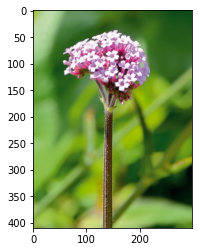

In [14]:
import cv2 as cv
import utils
from matplotlib import pyplot as plt

src = cv.imread('images/flower.png')
utils.imshow(src)

w, h = src.shape[:2]

## 临近点插值

当进行缩小映射时，先从缩小后的值计算原图像上的位置。比如缩小后图像上的位置10，是经过0.75缩小后映射的点，那么原图上的位置就是10÷0.75≈13.33，13.33在原图上的临近点就是13，以此类推，每个位置都是根据缩放比例反算出来在原图像上的位置，之后将原图上对应的临近点缩小到0.75。


## 双线性插值

双线性插值，不是简单copy源像素的值，而是获取四个最邻近目标像素的像素值乘以权重系数,双线性内插值算法在图像的放缩处理中，具有抗锯齿功能, 是最简单和常见的图像放缩算法，但是双线性内插值算法没有考虑边缘和图像的梯度变化，相比之下双立方插值算法更好解决这些问题

In [ ]:
dst = cv.resize(src, (w*2, h*2), interpolation=cv.INTER_LINEAR)
utils.imshow(dst)


## 双立方插值

双立方插值在图像放大过程可以保留更多的图像细节，放大以后的图像带有反锯齿的功能，
同时图像和源图像相比效果更加真实, 缺点是计算量比较大

In [ ]:
dst = cv.resize(src, (w*2, h*2), interpolation=cv.INTER_CUBIC)
utils.imshow(dst)

## Lanczos采样放缩
(todo: 原理待补充)

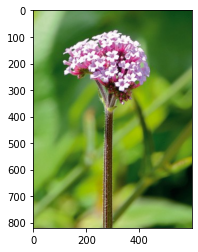

In [13]:
dst = cv.resize(src, (w*2, h*2), interpolation=cv.INTER_LANCZOS4)
utils.imshow(dst)

## 参考链接：
- [图像处理之三种常见双立方插值算法](https://blog.csdn.net/jia20003/article/details/40020775)
- [图像放缩之双立方插值](https://blog.csdn.net/jia20003/article/details/6919845)
- [图像放缩之双线性内插值](https://blog.csdn.net/jia20003/article/details/6915185)
- [图像处理之Lanczos采样放缩算法](https://blog.csdn.net/jia20003/article/details/17856859)

